In [8]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [9]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

In [10]:
#input_image_1, input_image_2 -> ../input/image_1/input_image_1
#                                ../input/image_1/input_image_2

In [11]:
class Test:
    def __init__(self, input_dir_path):
        self.input_dir_path = input_dir_path
        # list of pairs (input_image_1, input_image_2)
        self.input_images = []
        self.preprocessed_images = []

    def go_through_input_directory(self):
        list_subdirs_paths = [f.path for f in os.scandir(self.input_dir_path) if f.is_dir() and 'image' in f.name]
    
        for image_path in list_subdirs_paths:
            images = os.listdir(image_path)
            paths = []
            for image in images:
                paths.append(os.path.join(image_path, image))
            self.input_images.append(paths)
            
        return self.input_images

    # preprocessing
    def preprocess(self, image_path_1, image_path_2):
        image_1 = cv2.imread(image_path_1)
        image_2 = cv2.imread(image_path_2)
    
        width, height, _ = image_1.shape
        
        # resize_image_1
        image_1 = cv2.resize(image_1, [width // 3, height])
        # resize_image_2
        image_2 = cv2.resize(image_2, [width // 3, height])
        
        # create blackout
        blackout = np.zeros((height, width // 3, 3), dtype = np.uint8)
    
        #concatenate
        result_image = np.concatenate((image_1, blackout, image_2), axis=1)
    
        # resize to (256, 256, 3) -> generator
        result_image = cv2.resize(result_image, [IMAGE_WIDTH, IMAGE_HEIGHT])
        plt.figure()
        plt.imshow(result_image)

        return result_image

    def load_images(self):
        self.go_through_input_directory()
        
        for image_pair in self.input_images:
            if(len(image_pair) == 2):
                self.preprocessed_images.append(self.preprocess(image_pair[0], image_pair[1]))

        return self.preprocessed_images

        
        

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 55,  55,  55],
         [162, 162, 162],
         [162, 162, 162],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 57,  57,  57],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

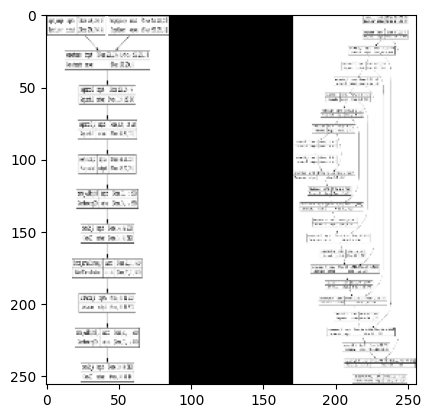

In [15]:
test = Test('../')
test.load_images()